<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.5/cifar_10_cnn_gpu_wbatchnorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load data**

In [6]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# **Data Preprocessing**

In [7]:
import numpy as np

x_mean=np.mean(x_train,axis=(0,1,2))
x_std=np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test=(x_test-x_mean)/x_std

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

print(x_train.shape,len(y_train))
print(x_val.shape,len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


# **Construct a model**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
# get gup_device
gpu_device_name = tf.test.gpu_device_name()
with tf.device(gpu_device_name):
  model=Sequential()
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Conv2D(filters=32,kernel_size=3,padding='same'))
  # model.add(BatchNormalization())
  # model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Conv2D(filters=64,kernel_size=3,padding='same'))
  # model.add(BatchNormalization())
  # model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model.add(Conv2D(filters=128,kernel_size=3,padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Conv2D(filters=128,kernel_size=3,padding='same'))
  # model.add(BatchNormalization())
  # model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])
  # Learning
  history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))


Epoch 1/30
1094/1094 [==============================] - 9s 7ms/step - loss: 1.4826 - acc: 0.4798 - val_loss: 1.2364 - val_acc: 0.5691
Epoch 2/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0931 - acc: 0.6180 - val_loss: 1.0979 - val_acc: 0.6205
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.9331 - acc: 0.6791 - val_loss: 1.0653 - val_acc: 0.6315
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8126 - acc: 0.7223 - val_loss: 1.0126 - val_acc: 0.6513
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7191 - acc: 0.7606 - val_loss: 1.0186 - val_acc: 0.6483
Epoch 6/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.6451 - acc: 0.7876 - val_loss: 0.9545 - val_acc: 0.6744
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5737 - acc: 0.8165 - val_loss: 0.9445 - val_acc: 0.6787
Epoch 8/30
1094/1094 [==============================] - 6s 6ms

# **Check the learning history**

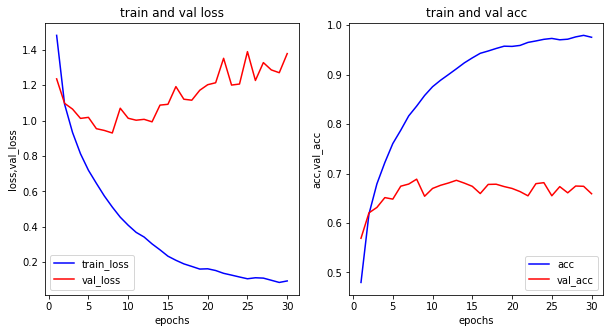

In [9]:
import matplotlib.pyplot as plt

hist_dict=history.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='red',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss,val_loss')
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='acc')
ax2.plot(epochs,val_acc,color='red',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc,val_acc')
ax2.legend(loc='lower right')

plt.show()

# **Visualize the Neural Net Processing**

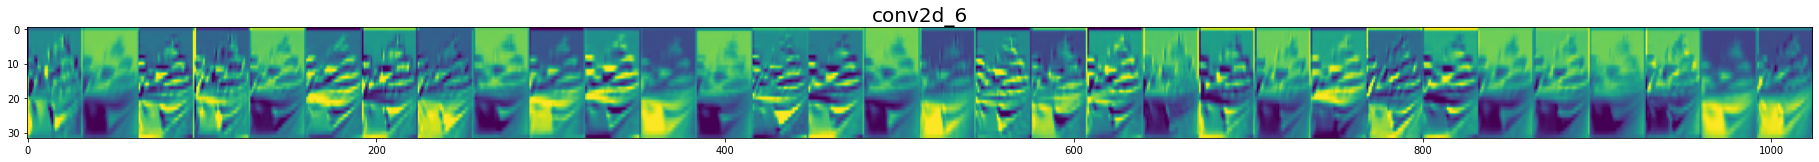

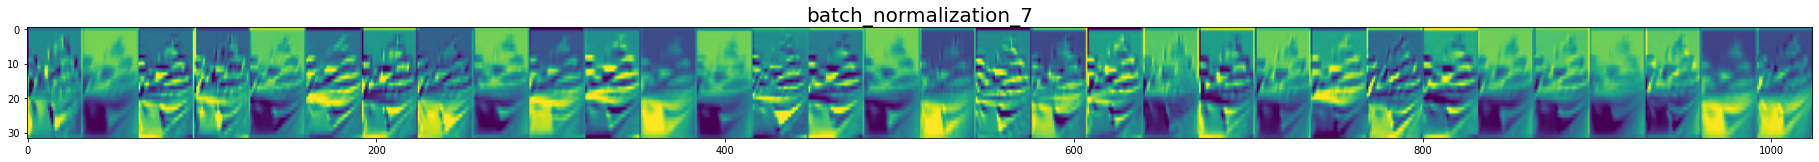

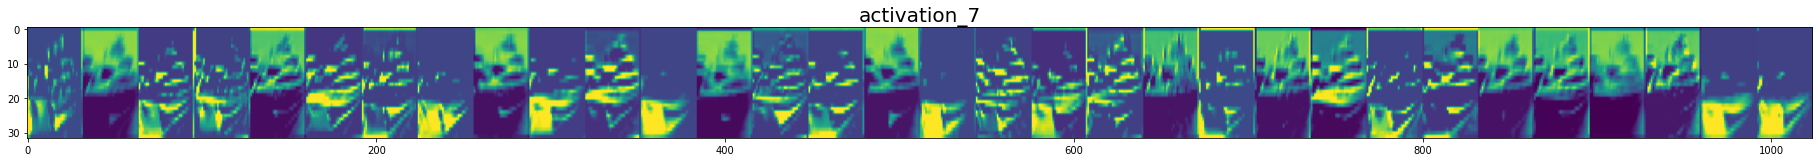

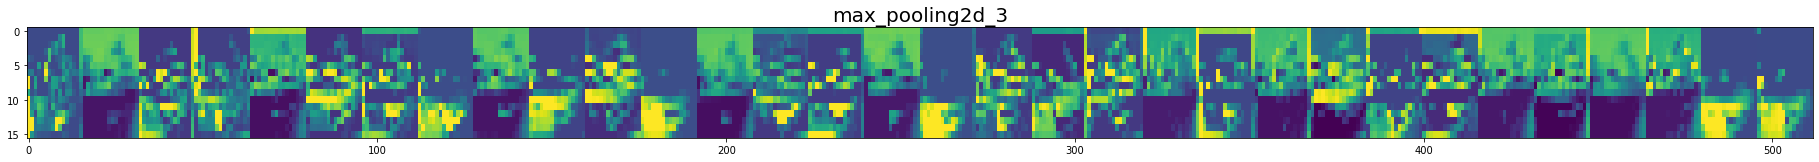

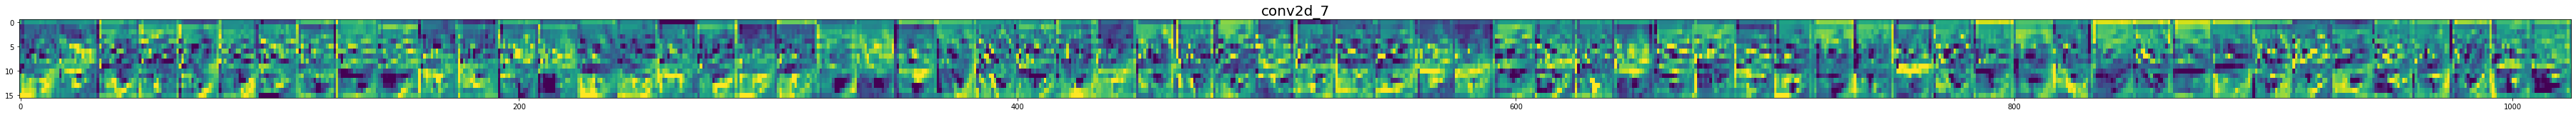

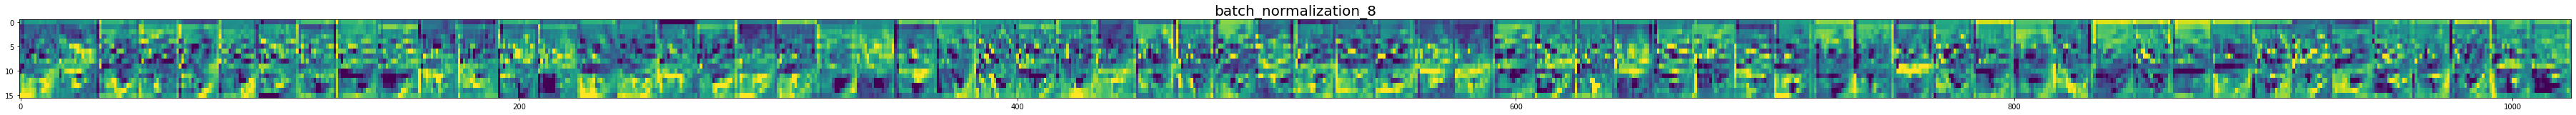

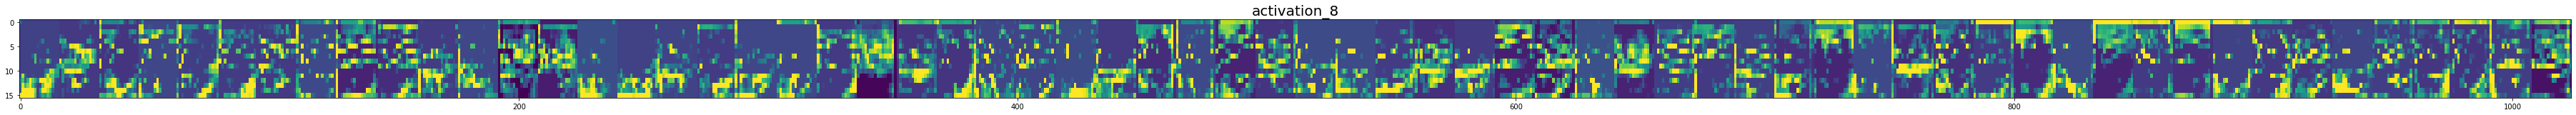

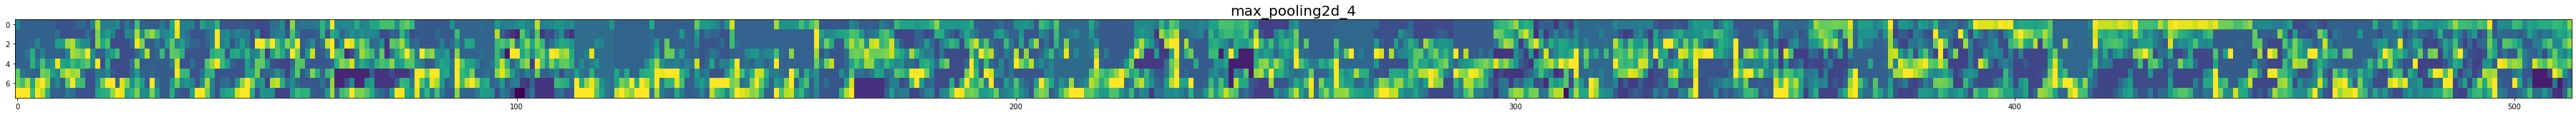

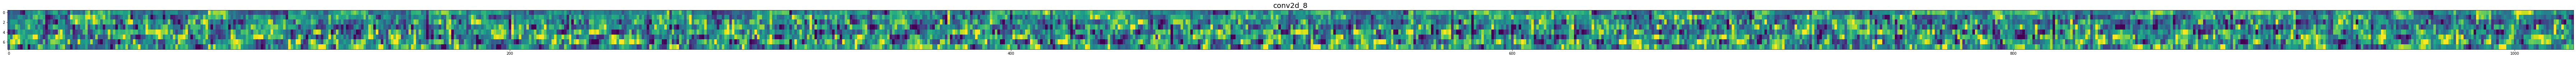

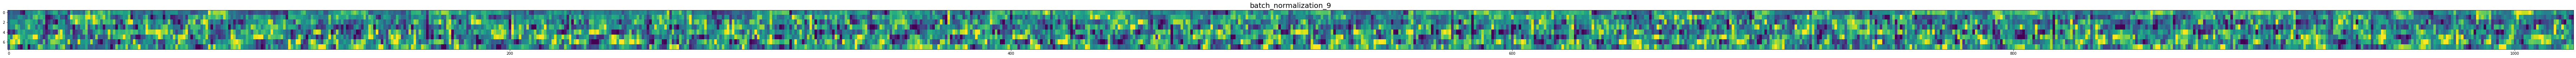

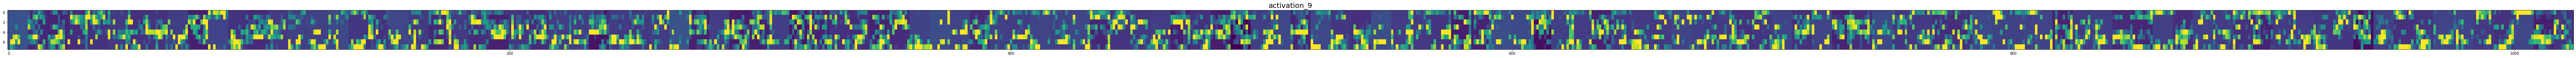

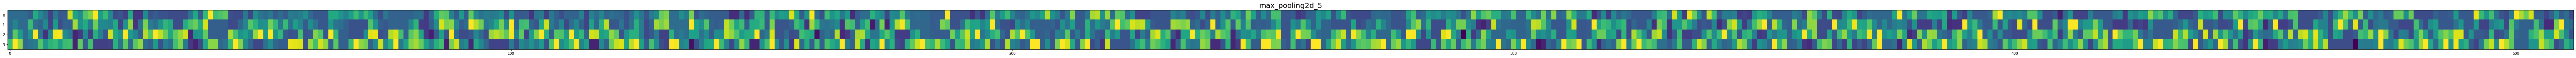

In [10]:
import tensorflow as tf

get_layer_name=[layer.name for layer in model.layers]
get_output=[layer.output for layer in model.layers]

visual_model=tf.keras.models.Model(inputs=model.input,outputs=get_output)

#print(x_test[1].shape)
#print(x_test[1])
test_img=np.expand_dims(x_test[1],axis=0)
#print(test_img.shape)
feature_maps=visual_model.predict(test_img)

for layer_name,feature_map in zip(get_layer_name,feature_maps):
  if(len(feature_map.shape)==4):
    img_size=feature_map.shape[1]
    features=feature_map.shape[-1]

    display_grid=np.zeros((img_size,img_size*features))

    for i in range(features):
      x=feature_map[0,:,:,i]
      x-=x.mean()
      x/=x.std()
      x*=64
      x+=128
      x=np.clip(x,0,255).astype('uint8')
      display_grid[:,i*img_size:(i+1)*img_size]=x
    
    plt.figure(figsize=(features,2+1./features))
    plt.title(layer_name,fontsize=20)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')
    
plt.show()